In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Warehouse Sales\Warehouse_and_Retail_Sales.csv')

df.head(2)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.0,1.0,4.0


# Cleaning & Preparing The Data

In [2]:
# I will convert all columns name to be title case - I prefer it like that :)
df.columns = df.columns.str.title()

In [3]:
# drop null values
df.dropna(inplace=True)

In [4]:
df.isna().sum()

Year                0
Month               0
Supplier            0
Item Code           0
Item Description    0
Item Type           0
Retail Sales        0
Retail Transfers    0
Warehouse Sales     0
dtype: int64

In [5]:
# exclude 'STR_SUPPLIES', 'KEGS', 'REF', 'DUNNAGE', because most of the values are zeros
df = df[df['Item Type'].isin(['WINE', 'BEER', 'LIQUOR','NON-ALCOHOL'])]

In [6]:
df['Item Type'].unique()


array(['WINE', 'BEER', 'LIQUOR', 'NON-ALCOHOL'], dtype=object)

In [7]:
# Calculate mean values for only saleable items
saleable_items = ['WINE', 'BEER', 'LIQUOR', 'NON-ALCOHOL']  # Define saleable items
mean_values = df[df['Item Type'].isin(saleable_items)].groupby('Item Type')[['Warehouse Sales', 'Retail Transfers', 'Retail Sales']].mean()

# Define a function to replace zeros
def replace_zeros_with_mean(row, mean_values):
    item_type = row['Item Type']
    for col in ['Warehouse Sales', 'Retail Transfers', 'Retail Sales']:
        if row[col] == 0.0 and item_type in mean_values.index:
            row[col] = mean_values.loc[item_type, col]  # Replace zero with mean for this item type
    return row

# Apply the function to rows where the item type is saleable
df = df.apply(replace_zeros_with_mean, mean_values=mean_values, axis=1)

In [8]:
df.sample()

,Year,Month,Supplier,Item Code,Item Description,Item Type,Retail Sales,Retail Transfers,Warehouse Sales
256817,2019,8,SUTTER HOME WINERY INC,80130,SUTTER HOME PINK MOSCATO - 750ML,WINE,10.92,8.0,39.0


In [9]:
# converting the Year & Month to datetime
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296862 entries, 0 to 307644
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Year              296862 non-null  int64         
 1   Month             296862 non-null  int64         
 2   Supplier          296862 non-null  object        
 3   Item Code         296862 non-null  object        
 4   Item Description  296862 non-null  object        
 5   Item Type         296862 non-null  object        
 6   Retail Sales      296862 non-null  float64       
 7   Retail Transfers  296862 non-null  float64       
 8   Warehouse Sales   296862 non-null  float64       
 9   Date              296862 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 24.9+ MB


In [10]:
# Convert numeric columns to float
numeric_columns = ['Retail Sales', 'Retail Transfers', 'Warehouse Sales']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
#df.info()


In [11]:
# extract month name from the date column that I created earlier
df['Month Name'] = df['Date'].dt.month_name()

# Exploratory Data Analysis (EDA):

## Warehouse Sales, Retail Sales and Retail Transfers Correlation

Now, let's analyze the correlation between Warehouse Sales, Retail Sales and Retail Transfer to see how strongly each pair of variables is related, for example if increases in warehouse sales are associated with increases in retail transfers.

In [12]:
corr = df[['Retail Sales', 'Warehouse Sales', 'Retail Transfers']].corr()

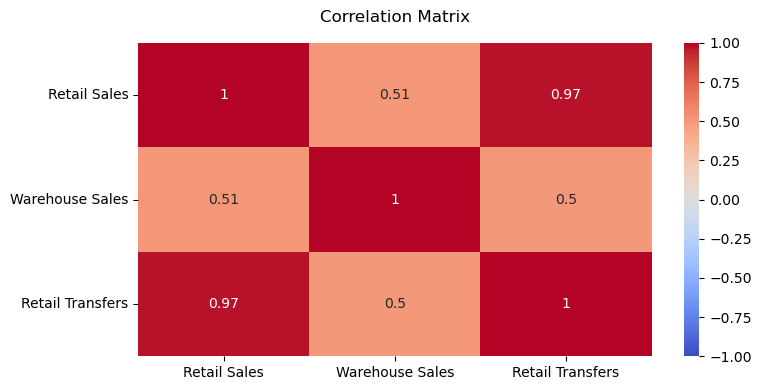

In [13]:
plt.figure(figsize=(8, 4))
sns.heatmap(
    data=corr,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)

plt.title('Correlation Matrix', pad=15)
plt.tight_layout()
plt.show()


### **Key Insights:**

This correlation matrix provides a clear understanding of the relationships between **Retail Sales**, **Warehouse Sales**, and **Retail Transfers**. Here’s a breakdown of the key observations:

---

#### **1. Strong Positive Correlation Between Retail Sales and Retail Transfers**
- **Correlation Coefficient**: **0.97**
- **Interpretation**: There is a **very strong positive relationship** between retail sales and retail transfers. This suggests that:
  - When retail transfers increase, retail sales tend to increase as well.
  - Retail transfers are likely a significant driver of retail sales.

#### **2. Moderate Positive Correlation Between Warehouse Sales and Retail Sales**
- **Correlation Coefficient**: **0.51**
- **Interpretion**: There is a **moderate positive relationship** between warehouse sales and retail sales. This indicates:
  - As warehouse sales increase, retail sales also tend to increase, but not as strongly as with retail transfers.
  - Wholesale activity (warehouse sales) may indirectly influence retail performance.

#### **3. Moderate Positive Correlation Between Warehouse Sales and Retail Transfers**
- **Correlation Coefficient**: **0.50**
- **Interpretation**: Similar to the relationship between warehouse sales and retail sales, there is a **moderate positive relationship** between warehouse sales and retail transfers. This suggests:
  - Wholesale activity (warehouse sales) may lead to increased retail transfers, which in turn drive retail sales.

---